In [1]:
! python2 -c 'print(hash("Hello"))' && python2 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))'

468330442038187741
468330442038187741
3312408455593491868
5198018345759002784


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from utils import load_net

In [3]:
part= "part-0"
k1 =11779
a = """0.85-0-tc-nets.pickle 621
0.8699999999999999-0-tc-nets.pickle 534
0.89-0-tc-nets.pickle 450
0.9099999999999999-0-tc-nets.pickle 354
0.93-0-tc-nets.pickle 289
0.95-0-tc-nets.pickle 210
0.2-0-tc-nets.pickle 4272
0.4-0-tc-nets.pickle 3207
0.6-0-tc-nets.pickle 2101"""

In [4]:
def convert_output(output):
    res3 = dict()
    for r in output.split('\n'):
        g = float(r.split('-')[0])
        siz=int(r.split(' ')[-1])
        res3[g] = siz
    
    return dict(sorted(res3.items()))
    

In [5]:
res = convert_output(output=a)

## two partitions merged together

In [6]:
b = """0.8-1-tc-nets.pickle 1204
0.95-1-tc-nets.pickle 249
0.8699999999999999-1-tc-nets.pickle 730
0.93-1-tc-nets.pickle 332
0.9099999999999999-1-tc-nets.pickle 464
0.89-1-tc-nets.pickle 593
0.85-1-tc-nets.pickle 867
0.6-1-tc-nets.pickle 3255
0.2-1-tc-nets.pickle 7442
0.4-1-tc-nets.pickle 5404"""
k2=23558

In [7]:
res2 = convert_output(b)

## Part 4 results

In [8]:
c="""0.85-1-tc-nets.pickle 1182
0.89-1-tc-nets.pickle 774
0.8-1-tc-nets.pickle 1722
0.4-1-tc-nets.pickle 9012
0.6-1-tc-nets.pickle 5092
0.2-1-tc-nets.pickle 12796
0.93-1-tc-nets.pickle 442
0.9099999999999999-1-tc-nets.pickle 583
0.8699999999999999-1-tc-nets.pickle 969
0.95-1-tc-nets.pickle 307"""
k3 = 47116

In [9]:
res3 = convert_output(c)

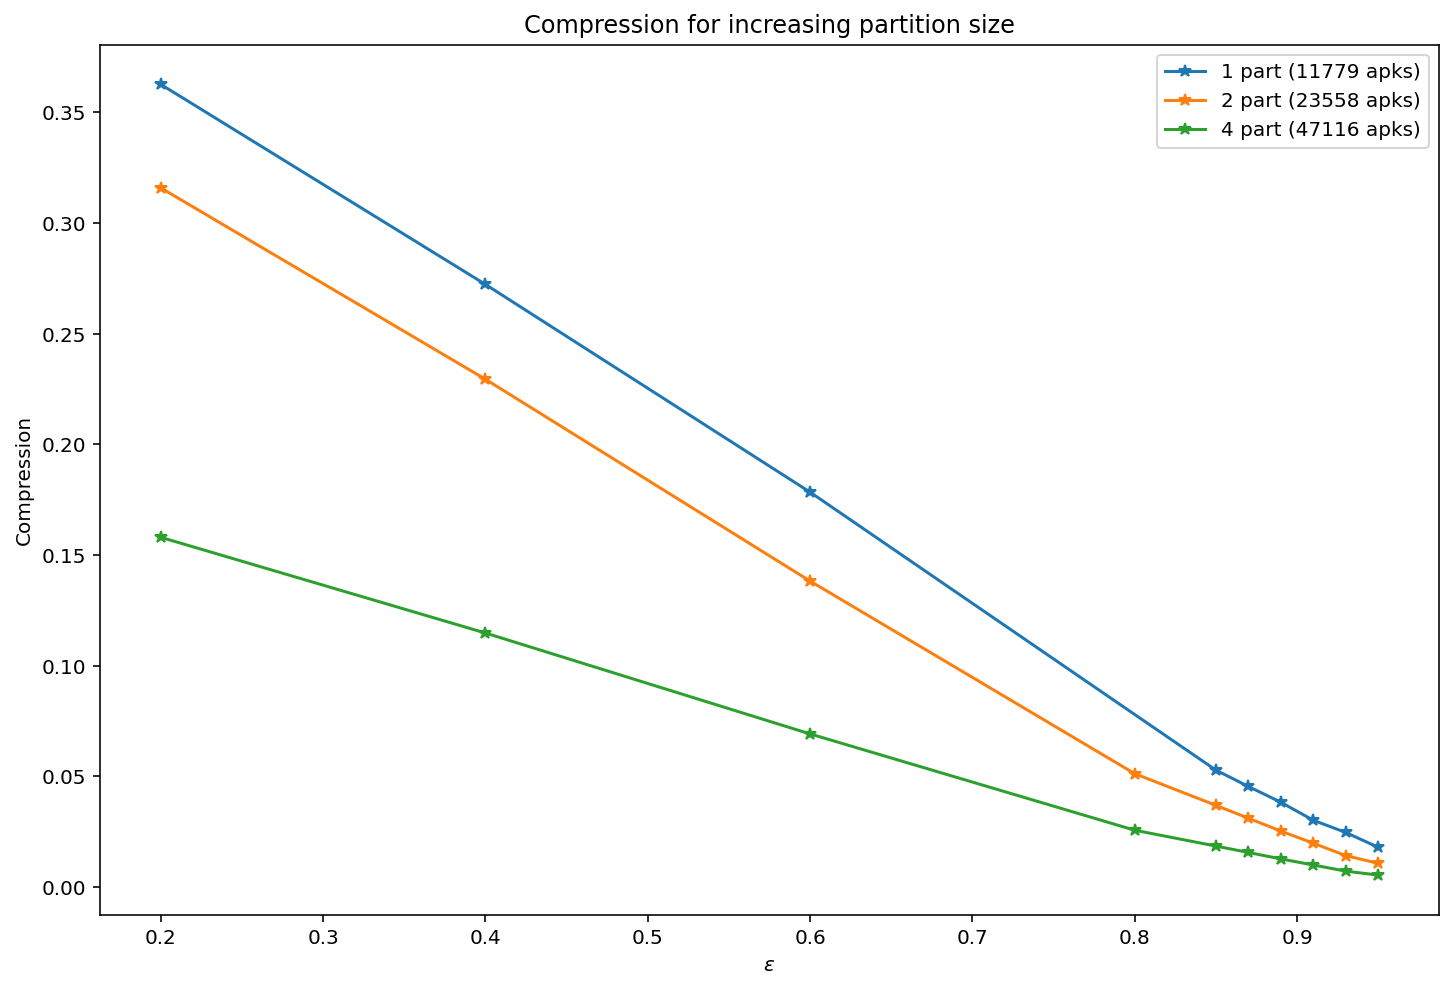

In [10]:
plt.figure(figsize=(12,8))
plt.title(f"Compression for increasing partition size")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label=f"2 part ({k2} apks)");
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"4 part ({k3} apks)");


plt.legend();


In [11]:
#merged-th15_ref.pickle
#stream-th15_aggreg.pickle
with open('../res/newres/new_merged_merged.pickle', 'rb') as f:
    nets_merged = pickle.load(f)
    
with open('../res/newres/new_merged_ref.pickle', 'rb') as f:
    nets_reference = pickle.load(f)
    
with open('../res/newres/new_streamed_vot.pickle', 'rb') as f:
    nets_streamed = pickle.load(f)

size = sum(map(sum, nets_reference[0.0].values()))

comp_merged = {gamma: len(net) for gamma, net in nets_merged.items()}
comp_ref = {gamma: len(net) for gamma,net in nets_reference.items()}
comp_stream = {gamma: len(net) for gamma,net in nets_streamed.items()}

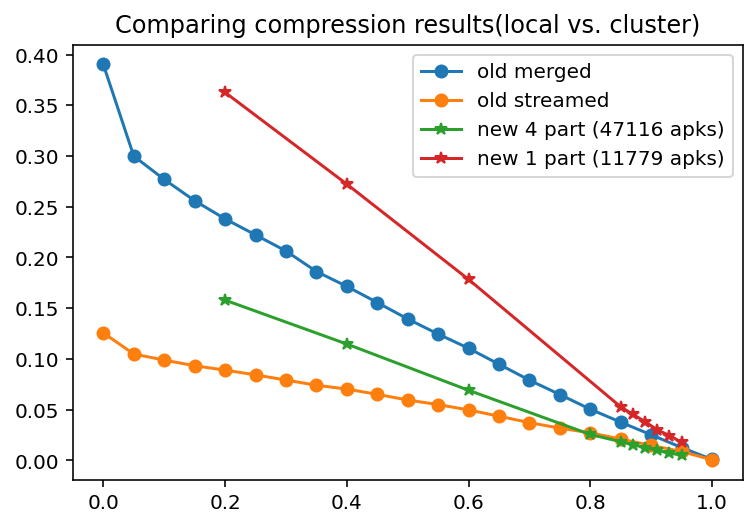

In [12]:
plt.title("Comparing compression results(local vs. cluster)")
plt.plot(list(comp_merged.keys()), np.array(list(comp_merged.values()))/size,'-o', label='old merged')
#plt.plot(list(comp_ref.keys()), np.array(list(comp_ref.values()))/size,'-o', label='reference')
plt.plot(list(comp_stream.keys()), np.array(list(comp_stream.values()))/size,'-o', label='old streamed')
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"new 4 part ({k3} apks)");
plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"new 1 part ({k1} apks)");
plt.legend();

In [2]:
apks = pd.read_csv('../res/newclusterres/apks.csv', index_col=0)

In [3]:
f_size  =apks.shape[0]
print(f"Full data set has {f_size} apks")

Full data set has 189452 apks


In [13]:
f_size = 189452

In [14]:
sizes_merged = dict()
sizes_merged[0.65] = 8553
sizes_merged[0.75] = 4594
sizes_merged[0.85] = 1999

sizes_streamed = dict()
sizes_streamed[0.65] = 1799
sizes_streamed[0.75] = 1135
sizes_streamed[0.85] = 621


In [151]:
import matplotlib as mpl

mpl.use('svg')
new_rc_params = {
    "font.family": 'Times', #probably python doesn't know Times, but it will replace it with a different font anyway. The final decision is up to the latex document anyway
    "font.size": 14, #choosing the font size helps latex to place all the labels, ticks etc. in the right place
    "font.serif": [],
    "svg.fonttype": 'none',
    "lines.linewidth":2,
"lines.color":'k'} #to store text as text, not as path
mpl.rcParams.update(new_rc_params)

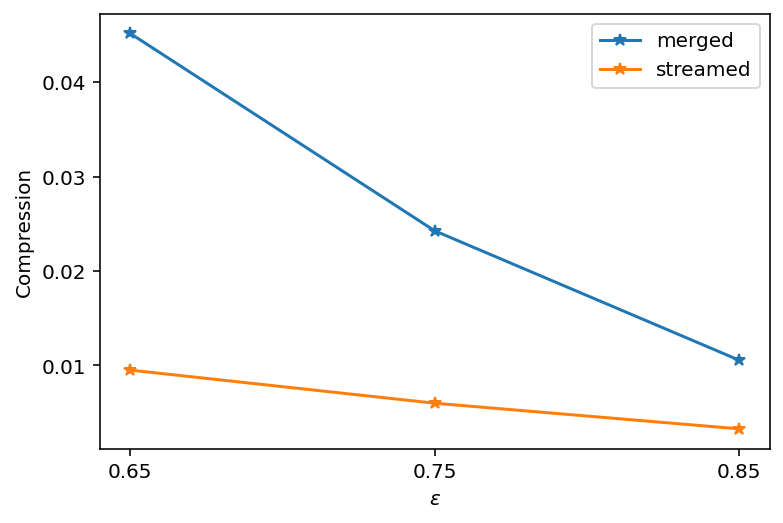

In [15]:
plt.plot(list(sizes_merged.keys()), list(map(lambda x: x/f_size, sizes_merged.values())),'-*' , label='merged')
plt.plot(list(sizes_streamed.keys()), list(map(lambda x: x/f_size, sizes_streamed.values())),'-*' , label='streamed')
plt.xlabel("$\epsilon$")
plt.xticks(list(sizes_merged.keys()))
plt.ylabel('Compression')

plt.legend();
plt.savefig('../fig/full_compression.svg', format='svg', bbox_inches = 'tight', dpi=1000)

## Network merging

> 2021-05-16 15:08:07,218 root INFO Loading networks 0.85

> 2021-05-16 15:08:08,165 root INFO Starting to merge 16 nets with gamma=0.85

> 2021-05-16 15:16:45,158 root INFO Starting network creation with k=10217

> 2021-05-16 15:23:37,005 root INFO Saved network with 1999

In [11]:
## Prec-recall for streamed network

In [16]:
#import graphlab as tc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
import pickle
import turicreate as tc
import pandas as pd
import re
import glob

In [17]:
labels = pd.read_csv('../res/newclusterres/apks_labels_hashed.csv', index_col=0)

In [18]:
def read_and_conv(fname, labels):
    with open(fname, 'rb') as f:
        eres = pickle.load(f)
    tblre = dict()
    for r, val in eres:
        tblre[r['apk']] = [r['nn'], val, not labels.loc[r['apk']]['malware_label']]
    return pd.DataFrame.from_dict(tblre, orient='index', columns=[ 'nearest', 'prob', 'true_val'])

def process_filelist(fnames, prefix):
    dfs = list()
    res = dict()
    for fname in fnames:
    
        df = read_and_conv(fname=fname, labels=labels)
        dfs.append(dfs)
        [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
        auc1 = auc(r1, p1)

        g = float(re.findall("\d+\.\d+", fname)[0])
        res[f"{prefix}-{g}"] = [p1, r1, auc1]
    
    return [dfs, res]

In [19]:

stream_dfs, stream_res = process_filelist(fnames=glob.glob('../res/newclusterres/streamed*.pickle'), prefix='streamed')

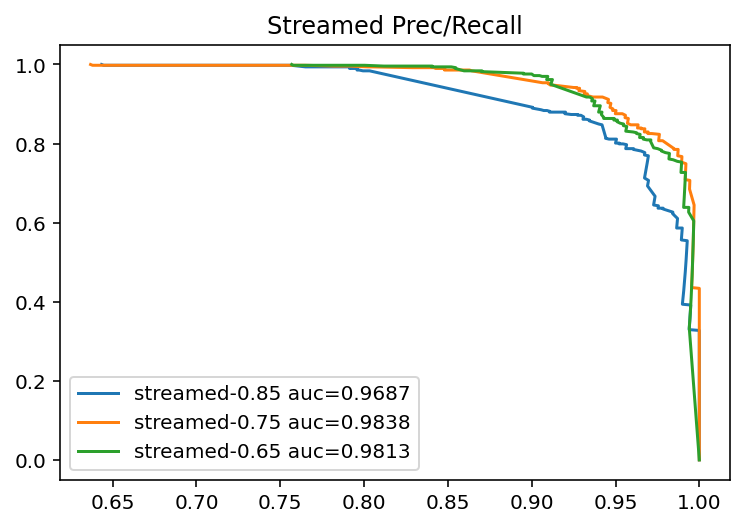

In [20]:
plt.title(f"Streamed Prec/Recall")
for k, v in stream_res.items():
    [p1, r1, auc1] = v
    plt.plot(p1, r1, label=f"{k} auc={auc1:.4f}")

plt.legend();

# merged

In [21]:
dfs, res= process_filelist(fnames=glob.glob('../res/newclusterres/merged-*evalresults.pickle'), prefix='merged')

In [ ]:
! ls ../res/newclusterres/mer

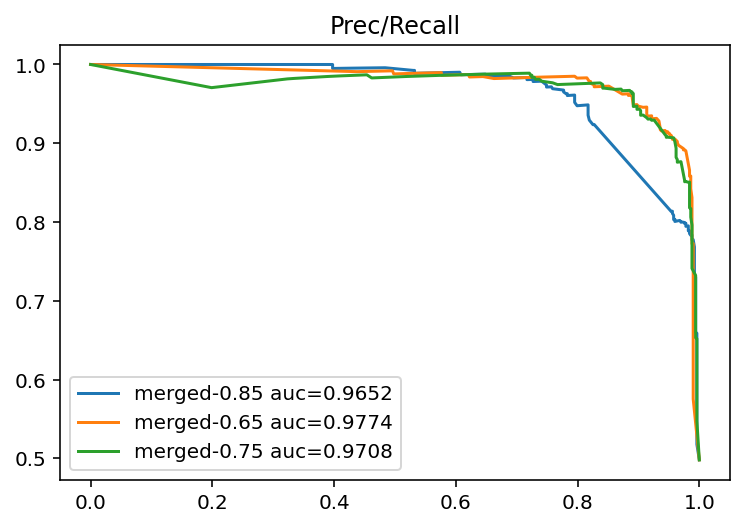

In [22]:
plt.title(f"Prec/Recall")
for k, v in res.items():
    [p1, r1, auc1] = v
    plt.plot(r1, p1, label=f"{k} auc={auc1:.4f}")

plt.legend();

In [23]:
m = {**res, **stream_res}

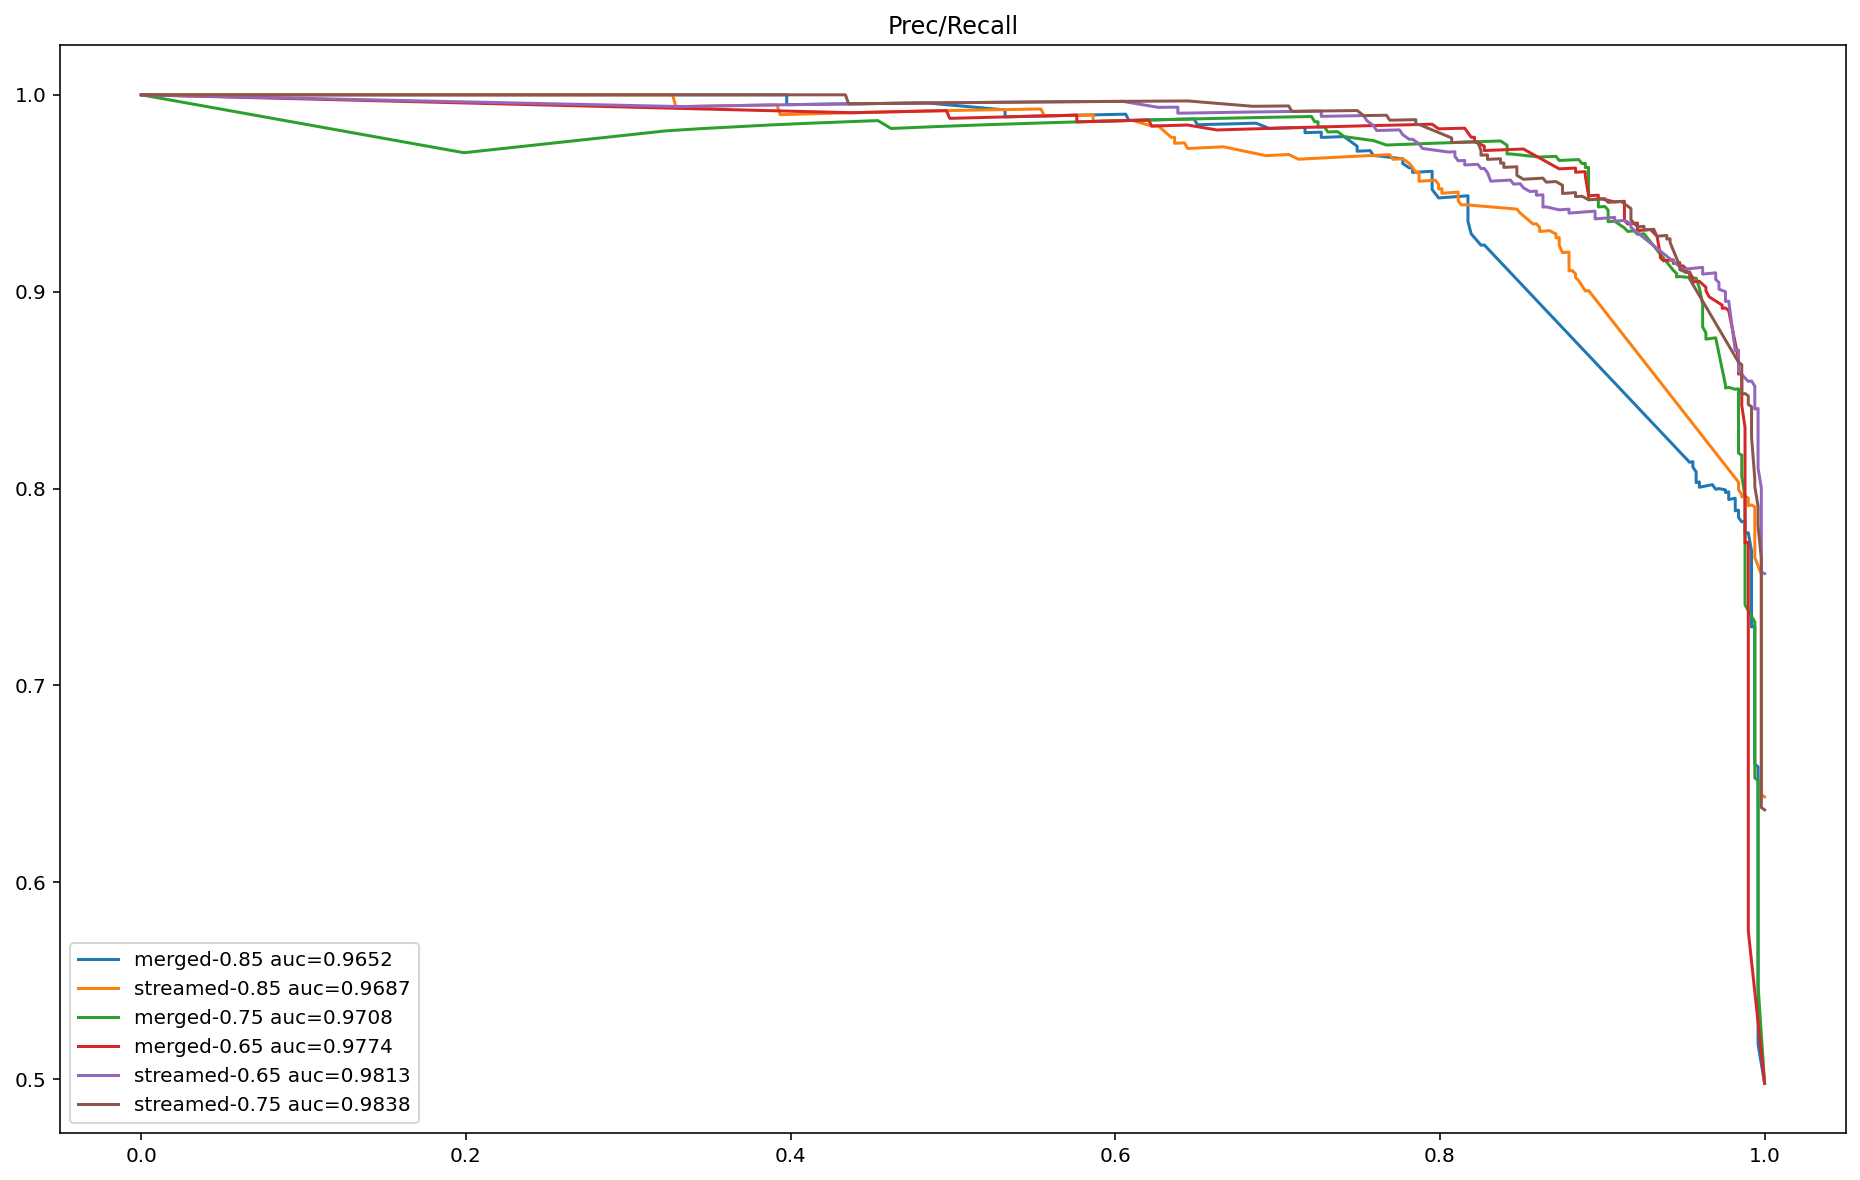

In [24]:
m2 = dict(sorted(m.items(), key=lambda x: x[1][2]))
plt.figure(figsize=(16,10))
plt.title(f"Prec/Recall")
for k, v in m2.items():
    [p1, r1, auc1] = v
    plt.plot(r1, p1, label=f"{k} auc={auc1:.4f}")

plt.legend();

In [115]:
## Compare with old

In [25]:
# new results
with open('../res/newres/probs_new_merged.pickle', 'rb') as f:
    merged_probs = pickle.load(f)
    
with open('../res/newres/probs-new-streamed.pickle', 'rb') as f:
    stream_probs = pickle.load(f)
    
with open('../res/newres/probs_new_ref.pickle', 'rb') as f:
    ref_probs = pickle.load(f)

In [26]:
gammas = list(ref_probs.keys())[:-1]
to_plot=dict()

for gamma in gammas:
    probs, true_vals = ref_probs[gamma]
    [p1, r1, thresholds] = precision_recall_curve(true_vals, probs)
    auc1 = auc(r1, p1)
    
    probs, true_vals = merged_probs[gamma]
    [p2, r2, thresholds] = precision_recall_curve(true_vals, probs)
    auc2 = auc(r2, p2)
    
    probs, true_vals = stream_probs[gamma]
    [p3, r3, thresholds] = precision_recall_curve(true_vals, probs)
    auc3 = auc(r3, p3)

    to_plot[gamma] = [p1, r1, auc1, p2, r2, auc2, p3, r3, auc3]

In [27]:
aucs = dict()
for gamma, [p1, r1, auc1, p2, r2, auc2, p3, r3, auc3]  in to_plot.items():
    aucs[gamma] = [auc1, auc2, auc3]

df = pd.DataFrame.from_dict(aucs, orient='index', columns=['auc_ref', 'auc_mer', 'auc_stream'])

In [28]:
m2.keys()

dict_keys(['merged-0.85', 'streamed-0.85', 'merged-0.75', 'merged-0.65', 'streamed-0.65', 'streamed-0.75'])

In [29]:

[ref_p, ref_r, auc1, merged_p, merged_r, auc2, streamed_p, streamed_r, auc3] = to_plot[0.65]
[new_m_p1, new_m_r1, auc_m] = m2['merged-0.65']
[new_s_p1, new_s_r1, auc_s] = m2['streamed-0.65']


In [30]:
m2.keys()

dict_keys(['merged-0.85', 'streamed-0.85', 'merged-0.75', 'merged-0.65', 'streamed-0.65', 'streamed-0.75'])

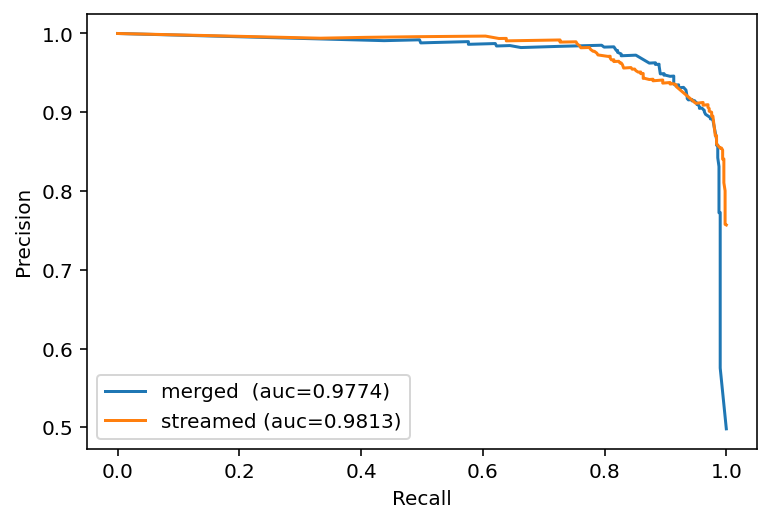

In [31]:
#plt.figure(figsize=(12,8))
#plt.title("Precision recall for different networks at $\epsilon$=0.65")
#plt.plot(ref_p, ref_r, label=f"old_reference  ")
#plt.plot(merged_p, merged_r, label=f"old_merged  ")
#plt.plot(streamed_p, streamed_r, label=f"old_streamed  ")

plt.plot( new_m_r1,new_m_p1, label=f"merged  (auc={auc_m:.4f})")
plt.plot(new_s_r1, new_s_p1, label=f"streamed (auc={auc_s:.4f})")

plt.legend(loc=3);
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('../fig/full_pre_re.svg', format='svg', bbox_inches = 'tight', dpi=1000);

## performance/model size

## 2nd run

In [32]:
f_size = 189452
#glob.glob('../res/newclusterres/streamed-0.65-0.2/')

def get_file_names(gamma, p_size):
    eval_name = f"../res/newclusterres/2ndrun/streamed-{gamma}-{p_size}/{gamma}-{p_size}-evalresults.pickle"
    net_name = f"../res/newclusterres/2ndrun/streamed-{gamma}-{p_size}/merged-{gamma}-0-tc-nets-voting.pickle"
    return eval_name, net_name
    
def read_go(gammas, p_sizes, get_file_names=get_file_names):
    fnames = dict()
    aucs = dict()
    sizes = dict()
    for p_size in p_sizes: # list(range(2,10,2)):
        a = list()
        b = list()
        c = list()
        for gamma in gammas:
            eval_name, net_name = get_file_names(gamma=gamma, p_size=p_size)
            _, net = load_net(net_name)
            c.append(len(net))
            a.append(eval_name)
            df = read_and_conv(eval_name, labels)
            [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
            b.append(auc(r1, p1))

        fnames[p_size] = a
        aucs[p_size] = b
        sizes[p_size] = c
        
    return aucs, sizes
    

In [33]:
gammas = [ 0.65, 0.75, 0.85, 0.95] # 0.3, 0.35, 0.4, 0.45, 0.5,0.6,
p_sizes_new = [f"0.0{a}" for a in range(2,10,2)] + ['0.10', '0.15']

aucs_new, sizes_new = read_go(gammas=gammas, p_sizes=p_sizes_new)

p_sizes_old = [a for a in range(2,10,2)]
aucs_old, sizes_old = read_go(gammas=gammas, p_sizes=p_sizes_old)


In [35]:
aucs_old.items()

dict_items([(2, [0.9795756542668582, 0.9740168264373068, 0.9678238700010833, 0.9439114579490893]), (4, [0.9803634320554648, 0.9755436536541195, 0.9732007533929042, 0.9387437112114805]), (6, [0.9791080640575174, 0.9800957175707685, 0.9706398759578949, 0.9315948761684003]), (8, [0.9823092325046172, 0.9811168407575404, 0.9754726017098004, 0.9452643571786422])])

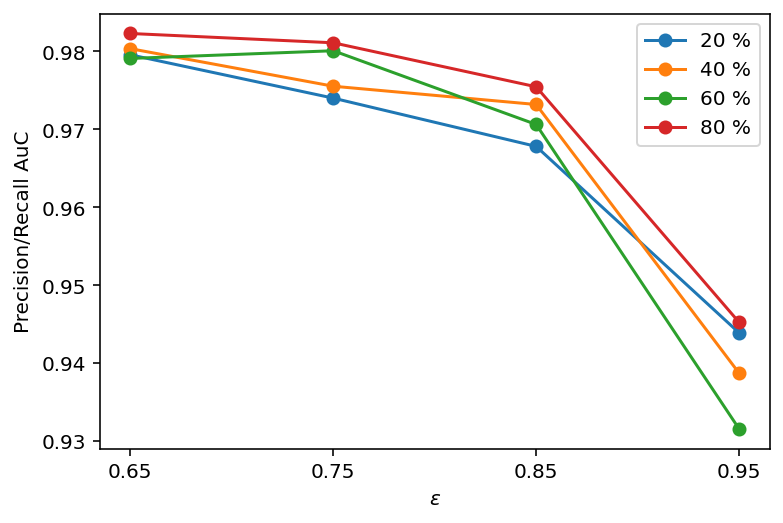

In [36]:
#plt.title('Performance for different sizes of the origin network')
for k, mauc in aucs_old.items():
    plt.plot(gammas, mauc,'-o', label=f"{int(k)*10} %")

plt.xlabel(f"$\epsilon$")
plt.ylabel('Precision/Recall AuC')
plt.xticks(gammas)
plt.legend();
#plt.savefig('../fig/part_auc.svg', format='svg', bbox_inches = 'tight', dpi=1000);

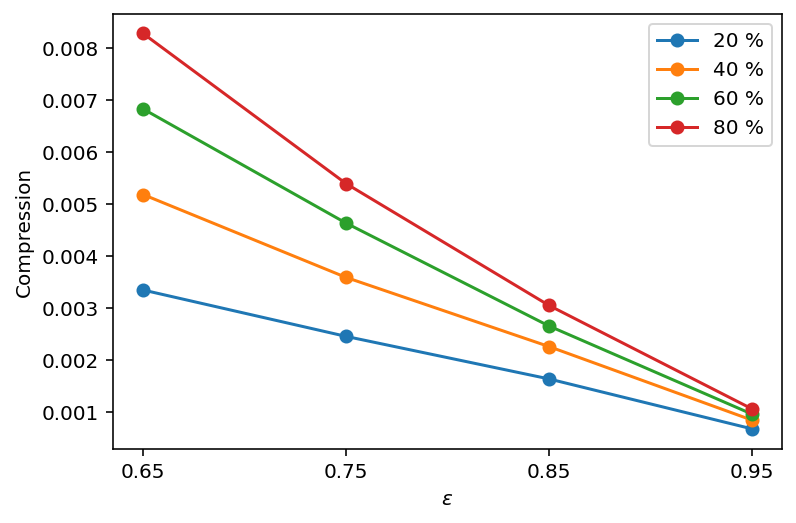

In [37]:
#plt.title('Size of the final model for different sizes of the origin network')
for k, ss in sizes_old.items():
    plt.plot(gammas, list(map(lambda x: x/f_size, ss)),'-o', label=f"{int(k)*10} %")
    
plt.xlabel(f"$\epsilon$")
plt.xticks(gammas)
plt.ylabel('Compression')
plt.legend();
plt.savefig('../fig/part_comp.svg', format='svg', bbox_inches = 'tight', dpi=1000);

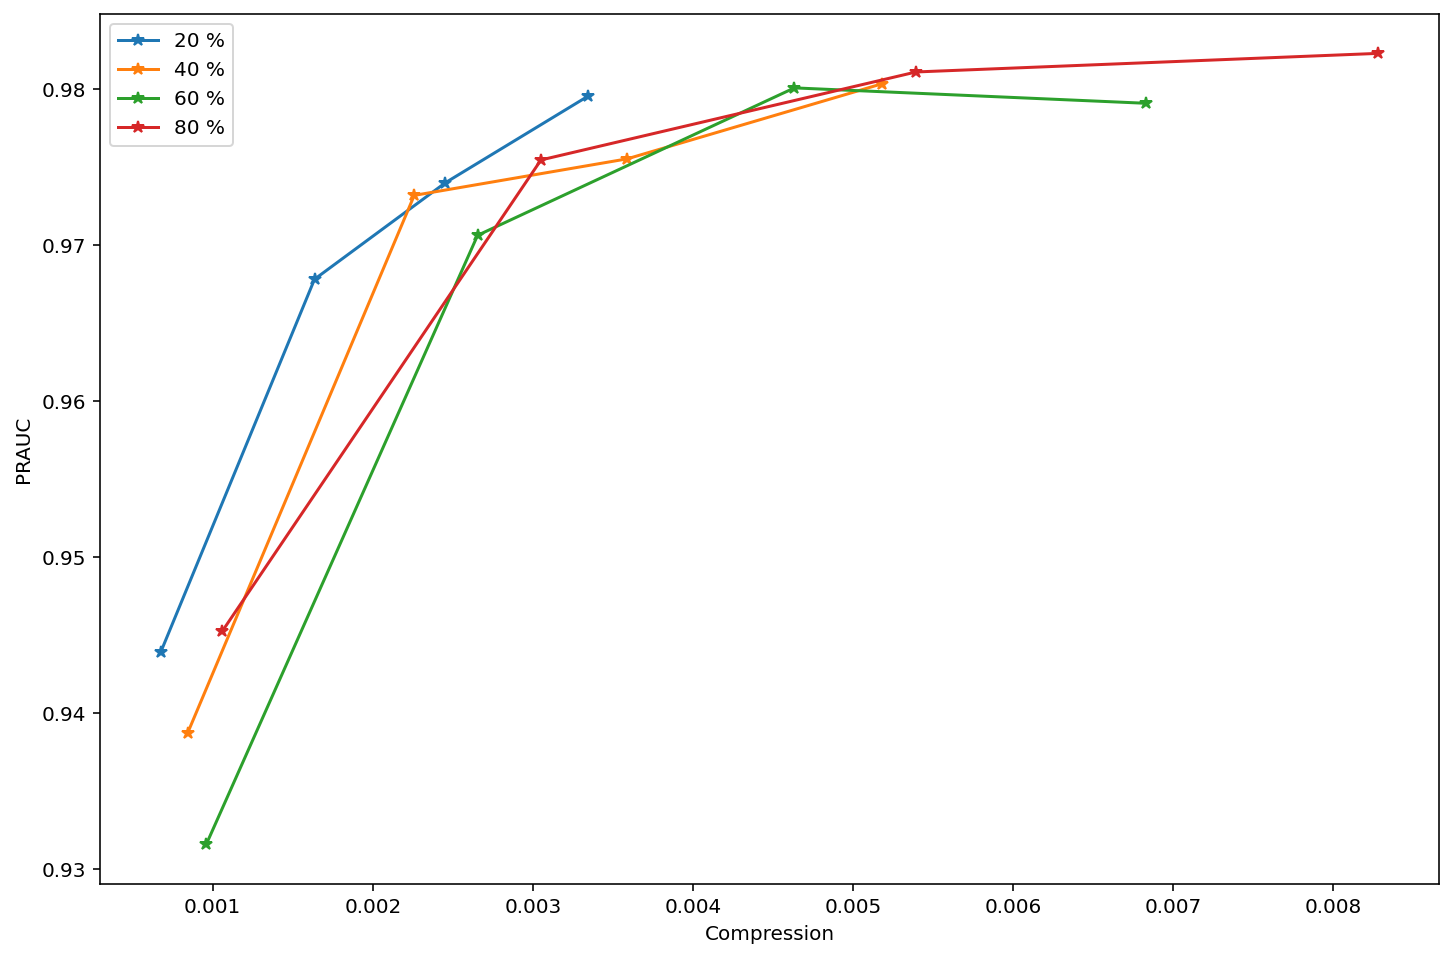

In [38]:
#PRAUC on y axis and compression on the x axis
plt.figure(figsize=(12,8))

for k, ss in sizes_old.items():
    plt.plot(list(map(lambda x: x/f_size, ss)), aucs_old[k],'-*', label=f"{int(k)*10} %")
    
plt.legend()
plt.xlabel('Compression')
plt.ylabel('PRAUC');

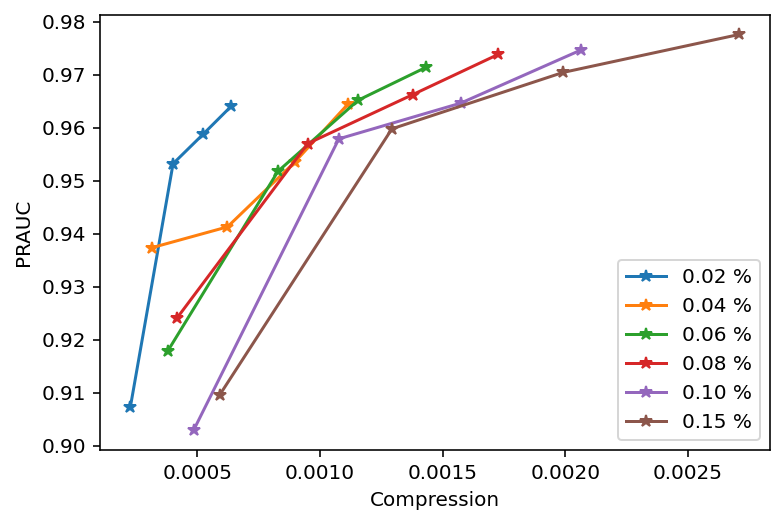

In [40]:
for k,ss in sizes_new.items():
    plt.plot(list(map(lambda x: x/f_size, ss)), aucs_new[k],'-*', label=f"{k} %")
    
plt.legend()
plt.xlabel('Compression')
plt.ylabel('PRAUC');

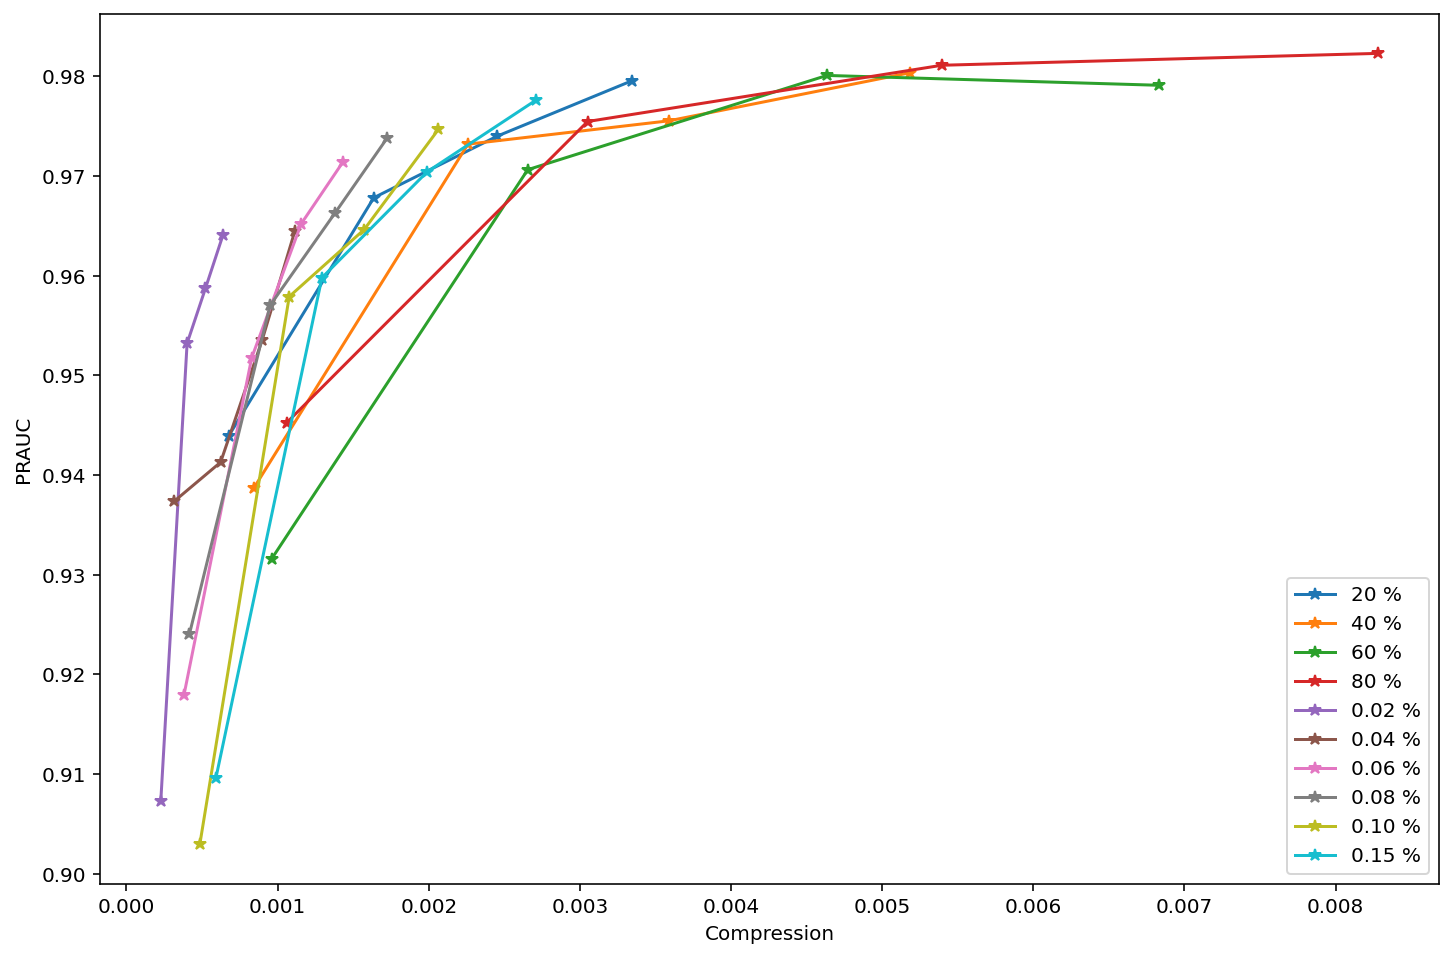

In [41]:
#PRAUC on y axis and compression on the x axis
plt.figure(figsize=(12,8))

for k, ss in sizes_old.items():
    plt.plot(list(map(lambda x: x/f_size, ss)), aucs_old[k],'-*', label=f"{k*10} %")
    
for k,ss in sizes_new.items():
    plt.plot(list(map(lambda x: x/f_size, ss)), aucs_new[k],'-*', label=f"{k} %")
    
plt.legend()
plt.xlabel('Compression')
plt.ylabel('PRAUC');

## Origin network

In [43]:
def get_origin_file_names(gamma, p_size):
    eval_name = f"../res/newclusterres/ori/complete_nets/streamed-{gamma}-{p_size}/{gamma}-evalresults.pickle"
    net_name = f"../res/newclusterres/ori/complete_nets/streamed-{gamma}-{p_size}/{gamma}-streamed-0-voting.pickle"
    return eval_name, net_name

gammas = [ 0.65, 0.75, 0.85, 0.95] # 0.3, 0.35, 0.4, 0.45, 0.5,0.6,
p_sizes_new = [f"0.0{a}" for a in range(2,10,2)] + ['0.10', '0.15'] + list(range(2,10,2))

aucs_ori, sizes_ori = read_go(gammas=gammas, p_sizes=p_sizes_new, get_file_names=get_origin_file_names)

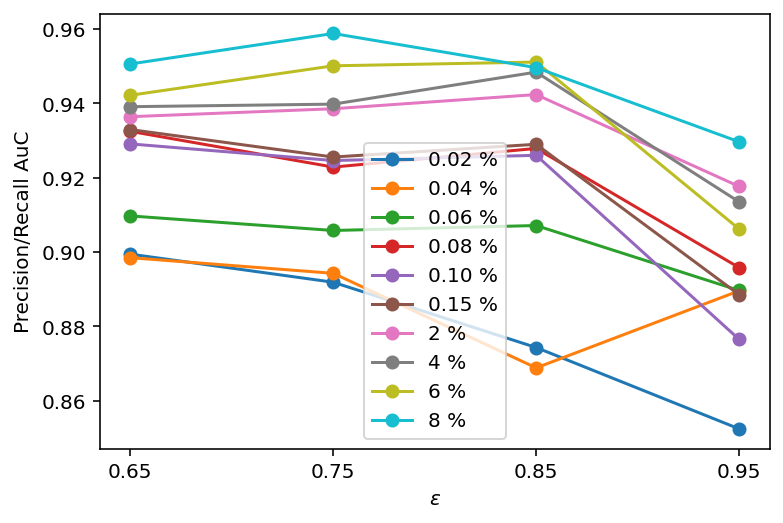

In [136]:
for k, mauc in aucs_ori.items():
    plt.plot(gammas, mauc,'-o', label=f"{k} %")

plt.xlabel(f"$\epsilon$")
plt.ylabel('Precision/Recall AuC')
plt.xticks(gammas)
plt.legend();

## Vote distributions

In [44]:
gammas = [ 0.65, 0.75, 0.85, 0.95] # 0.3, 0.35, 0.4, 0.45, 0.5,0.6,
p_sizes_new = [f"0.0{a}" for a in range(2,10,2)] + ['0.10', '0.15'] + list(range(2,10,2))

In [45]:

from collections import defaultdict
orign_nets = defaultdict(list)
for g in gammas:
    for s in p_sizes_new:
        _, net_name = get_origin_file_names(gamma=g, p_size=s)
        orign_nets[float(s)].append(load_net(net_name))

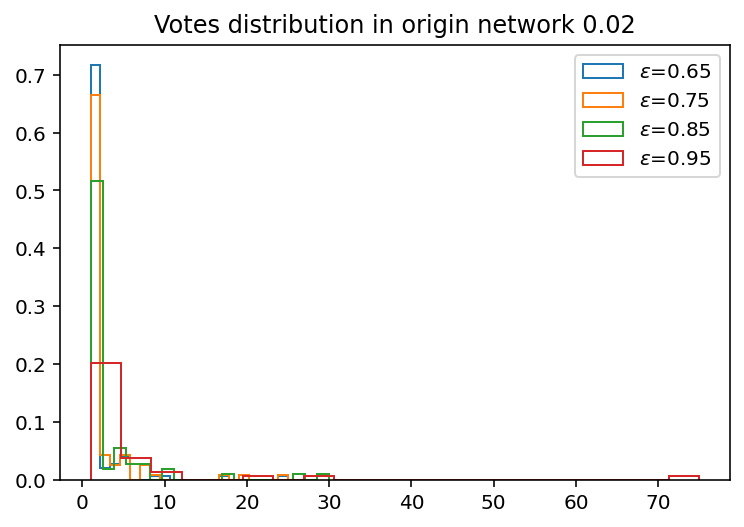

In [46]:
siz = 0.02
plt.title(f"Votes distribution in origin network {siz}")
for g, sing_net in orign_nets[siz]:
    vo = list(map(sum, sing_net.values()))
    plt.hist(vo,bins=20, density=True, histtype='step', label=f"$\epsilon$={g}");
    
plt.legend();

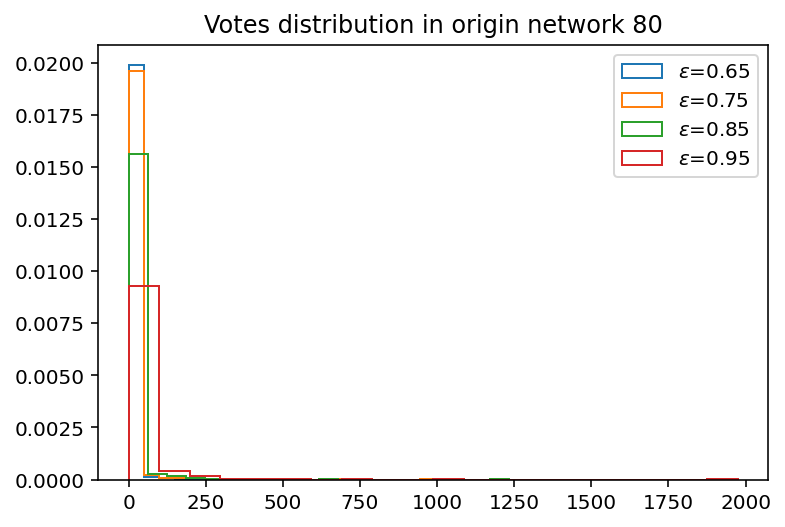

In [47]:
siz = 8
plt.title(f"Votes distribution in origin network {siz*10}")
for g, sing_net in orign_nets[siz]:
    vo = list(map(sum, sing_net.values()))
    plt.hist(vo,bins=20, density=True, histtype='step', label=f"$\epsilon$={g}");
    
plt.legend();

In [48]:

from collections import defaultdict
streamed_net = defaultdict(dict)
for s in p_sizes_new:
    for g in gammas:
        _, net_name = get_file_names(gamma=g, p_size=s)
        g2, n = load_net(net_name)
        streamed_net[float(s)][g] = n

NameError: name 'gplt' is not defined

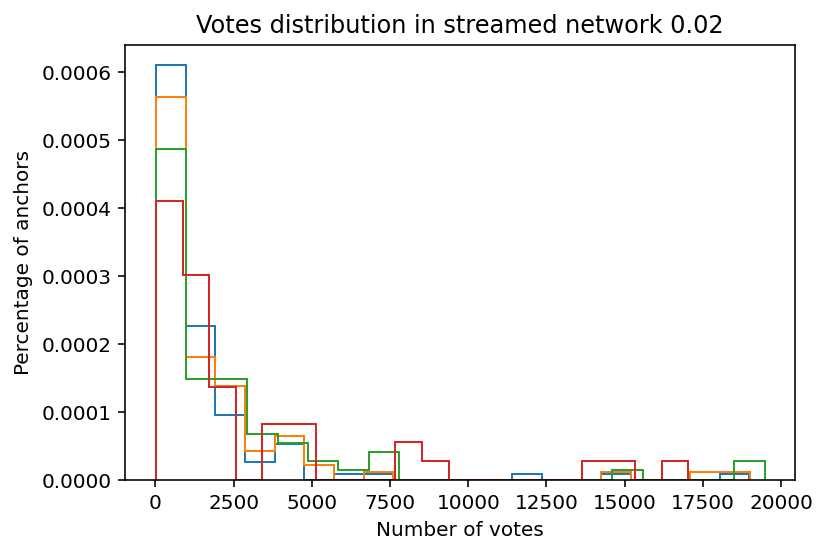

In [49]:
siz = 0.02
plt.title(f"Votes distribution in streamed network {siz}")
for g, sing_net in streamed_net[siz].items():
    vo = list(map(sum, sing_net.values()))
    plt.hist(vo,bins=20, density=True, histtype='step', label=f"$\epsilon$={g}");

plt.ylabel('Percentage of anchors')
plt.xlabel('Number of votes')
gplt.legend();

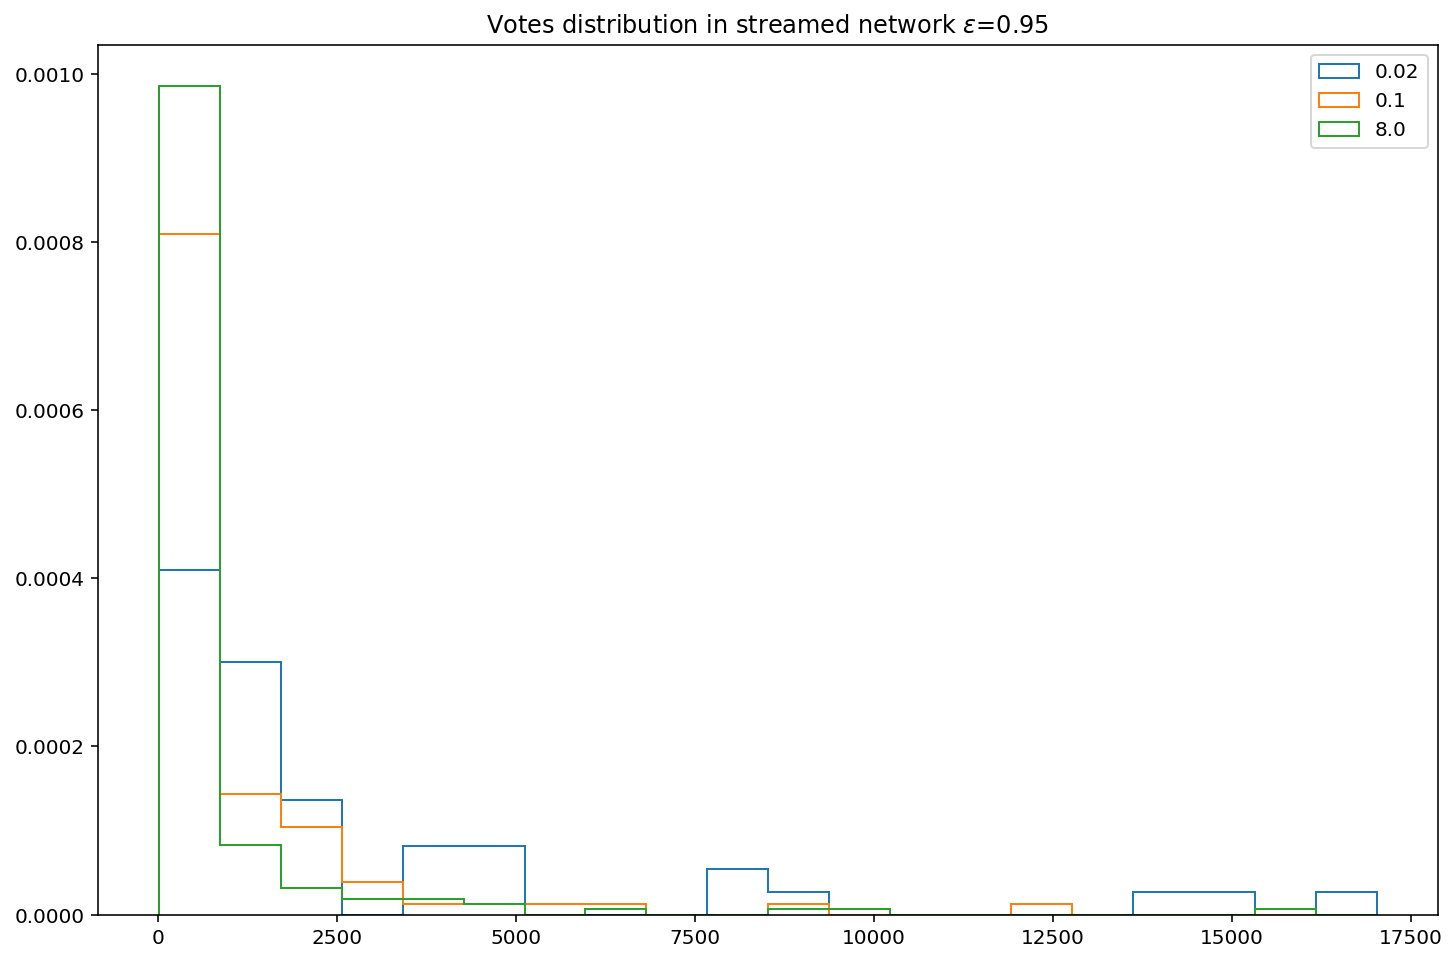

In [50]:
gam = 0.95
plt.figure(figsize=(12,8))
plt.title(f"Votes distribution in streamed network $\epsilon$={gam}")
bi = []
for siz in [0.02, 0.1, 8.0]:
    vo = list(map(sum, streamed_net[siz][gam].values()))
    if any(bi):
        n, bi, pat = plt.hist(vo,bins=bi, density=True, histtype='step', label=f"{siz}");
    else:
        n, bi, pat = plt.hist(vo,bins=20, density=True, histtype='step', label=f"{siz}");
    
plt.legend();
    

In [51]:
def fix_keys(di):
    cvt = lambda x: x*10 if x>1 else x
    return {cvt(float(k)): v for k,v in di.items()}
    

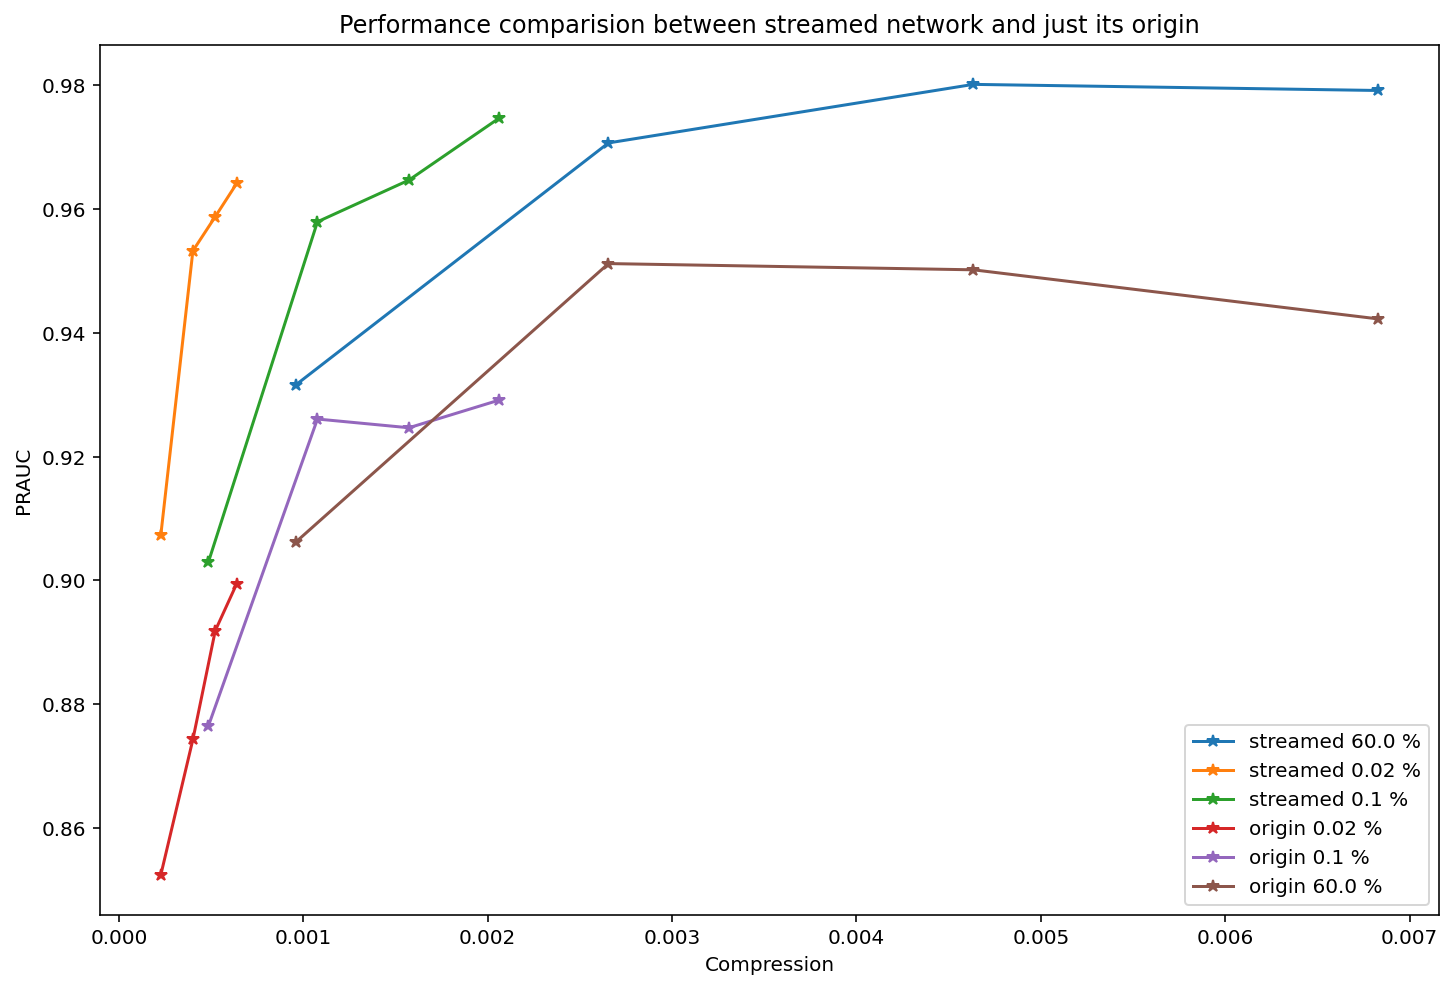

In [52]:
#PRAUC on y axis and compression on the x axis
plt.figure(figsize=(12,8))
plt.title('Performance comparision between streamed network and just its origin')

#for k, ss in sizes_old.items():
#    plt.plot(list(map(lambda x: x/f_size, ss)), aucs_old[k],'-*', label=f"{k*10} %")

dic_s = fix_keys(dict(sizes_old, **sizes_new))
dic_a = fix_keys(dict(aucs_old, **aucs_new))

sizes_ori = fix_keys(sizes_ori)
aucs_ori = fix_keys(aucs_ori)


only_those = [0.02, 0.10, 60.0] 
    
for k,ss in filter(lambda x: x[0] in only_those, dic_s.items()):
        plt.plot(list(map(lambda x: x/f_size, ss)), dic_a[k],'-*', label=f"streamed {k} %")
    
for k,ss in filter(lambda x: x[0] in only_those, sizes_ori.items()):
        plt.plot(list(map(lambda x: x/f_size, ss)), aucs_ori[k],'-*', label=f"origin {k} %")
    
    
plt.legend()
plt.xlabel('Compression')
plt.ylabel('PRAUC');

### Really random networks

Here the "network" is created by just randomly selecting apks from the 0 partition. The sizes are selected to match sizes of origin networks 

that would be 0.02 and 20% for $\epsilon$ = 0.65, 0.75, 0.85, 0.95


In [53]:
def load_random(sizes):
    aucs = []
    for p_size in sizes:
        eval_name = f"../res/newclusterres/randoms/{p_size}/{p_size}-evalresults.pickle"
        net_name = f"../res/newclusterres/randoms/{p_size}/merged-{p_size}-0-tc-nets-voting.pickle"

        df = read_and_conv(eval_name, labels)
        [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
        aucs.append(auc(r1, p1))
    return aucs

p_sizes_new2 = [121, 99, 76, 43]
p_sizes_alt2 = [634, 465, 310, 128]

aucs_ran0 = load_random(p_sizes_new2) # like 0.02% for 0.65, 0.75, 0.85, 0.95
aucs_ran2 = load_random(p_sizes_alt2) # like 20 %


In [54]:

a0 = dict(zip(p_sizes_new2, aucs_ran0))
a2 = dict(zip(p_sizes_alt2, aucs_ran2))

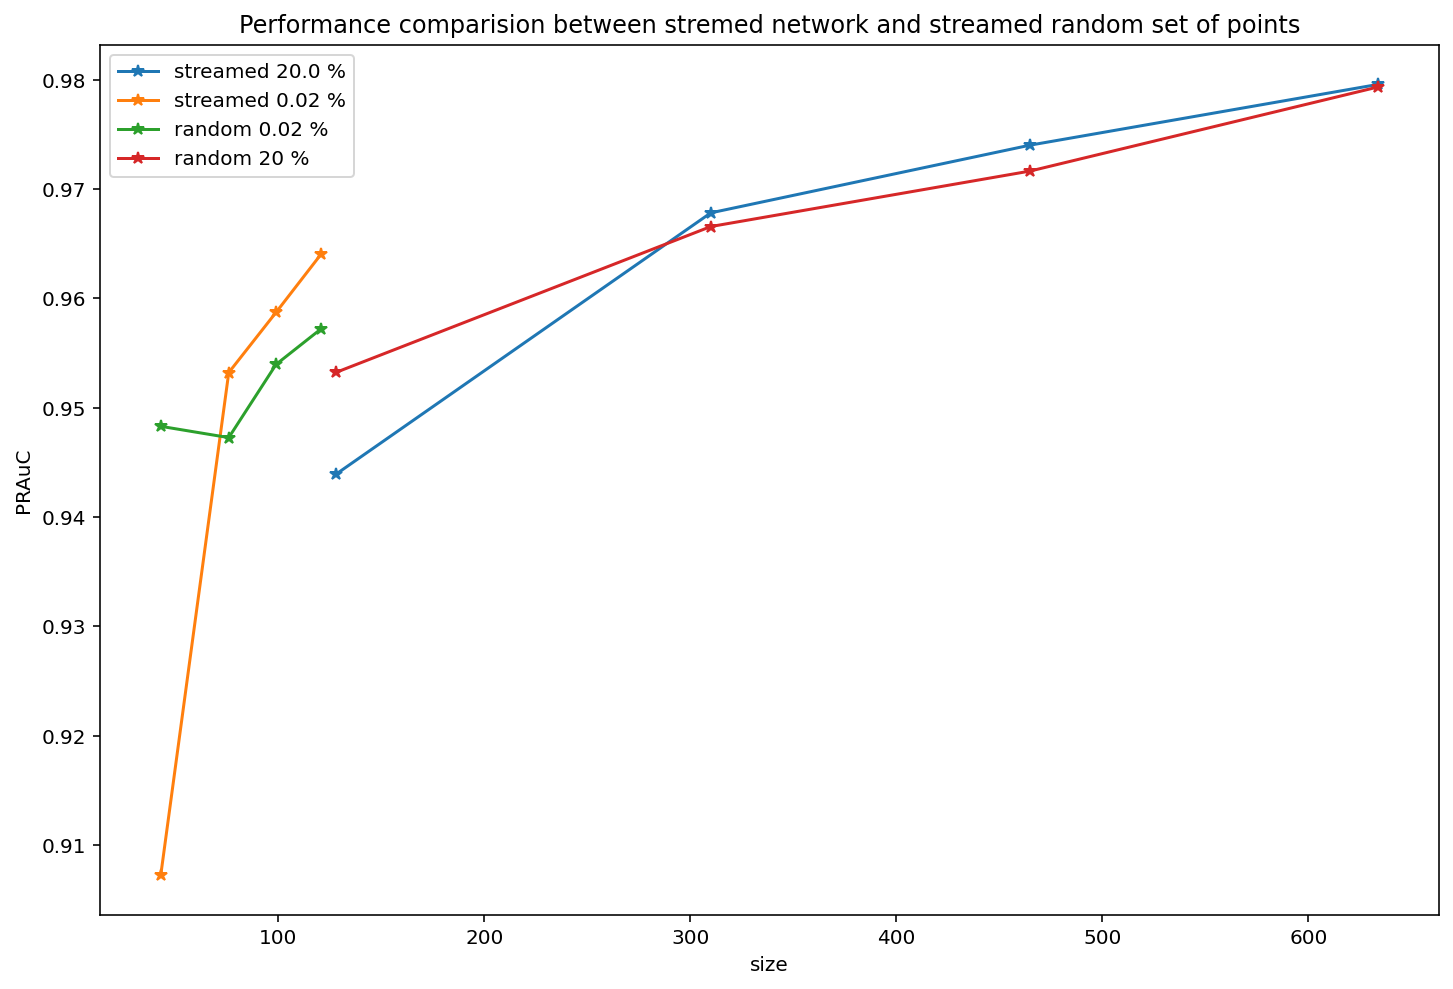

In [56]:
plt.figure(figsize=(12,8))
only_those = [0.02, 20.0] 

plt.title('Performance comparision between stremed network and streamed random set of points')

for k,ss in filter(lambda x: x[0] in only_those, dic_s.items()):
        plt.plot(list(map(lambda x: x, ss)), dic_a[k],'-*', label=f"streamed {k} %")
    

plt.plot(list(map(lambda x: x, a0.keys())), a0.values(),'-*', label=f"random 0.02 %")
plt.plot(list(map(lambda x: x, a2.keys())), a2.values(),'-*', label=f"random 20 %")

plt.xlabel('size')
plt.ylabel('PRAuC')
    
plt.legend();

In [ ]:
-random subset should be selected from the whole partition 
 
-4 subsets of 0.02 (independent) and streaming for different epsilon (break interdependecy)

--random could be the solution 
--partitioning?
---test for one partition: compare origin with random

--test: 1000 apk 
---cross-validation with partitions as test sets ?

--omitted anchor => how many 


### Breaking the deps

Here we made 4 esperiments with 4 different starting partitions of (0.02)


In [78]:
! ls ../res/newclusterres/break/1

0.65-evalresults.pickle             merged-0.65-0-tc-nets-voting.pickle
0.75-evalresults.pickle             merged-0.75-0-tc-nets-voting.pickle
0.85-evalresults.pickle             merged-0.85-0-tc-nets-voting.pickle
0.95-evalresults.pickle             merged-0.95-0-tc-nets-voting.pickle


In [86]:
rres = dict()
for ratio in range(1,5):
    aucs = list()
    sizes = list()
    for gamma in [0.65,0.75,0.85,0.95]:        
        eval_name = f"../res/newclusterres/break/{ratio}/{gamma}-evalresults.pickle"
        net_name = f"../res/newclusterres/break/{ratio}/merged-{gamma}-0-tc-nets-voting.pickle"
        df = read_and_conv(eval_name, labels)
        [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
        aucs.append(auc(r1, p1))
        
        _, net = load_net(net_name)
        sizes.append(len(net))
    rres[ratio] = [aucs, sizes]
        


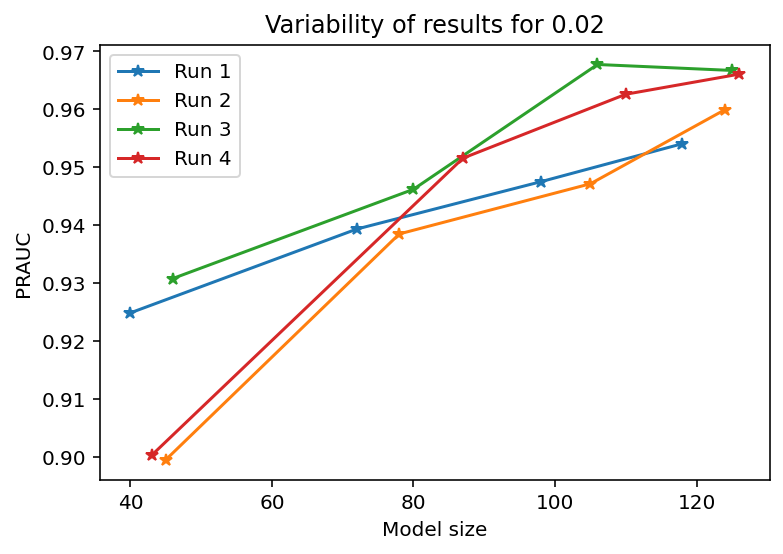

In [93]:
plt.title('Variability of results for 0.02')
for ratio in range(1,5):
    plt.plot(rres[ratio][1], rres[ratio][0], '-*', label=f"Run {ratio}")

plt.xlabel('Model size')
plt.ylabel('PRAUC')
plt.legend();